In [86]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [87]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [88]:
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [89]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [90]:
categorical_cols = train_data.columns[train_data.dtypes == np.object]
print(categorical_cols)
print(categorical_cols.shape[0])

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
43


In [91]:
numerical_cols = train_data.columns[train_data.dtypes != np.object][1:-1] # dropping Id and SalePrice
print(numerical_cols)
print(numerical_cols.shape[0])

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
36


In [92]:
target_col = 'SalePrice'

In [93]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:ylabel='Frequency'>

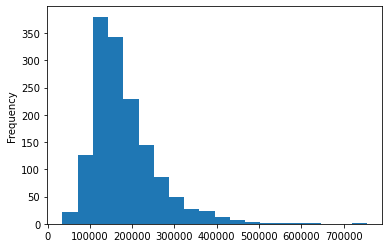

In [94]:
train_data.SalePrice.plot.hist(bins=20)

In [10]:
df = train_data.drop(columns=['Id'])

q_low = df["SalePrice"].quantile(0.02)
q_hi  = df["SalePrice"].quantile(0.98)

df = df[(df["SalePrice"] < q_hi) & (df["SalePrice"] > q_low)]

df[categorical_cols] = df[categorical_cols].fillna('_')
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

y = df[target_col]
X = df.drop([target_col], 1)

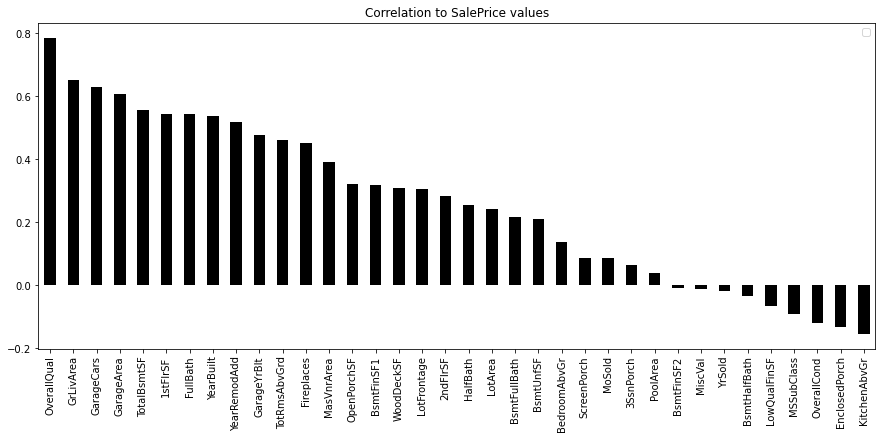

In [11]:
corr = df[numerical_cols.append(pd.Index(['SalePrice']))].corr()

corr_vals = pd.DataFrame(data=corr[['SalePrice']].drop('SalePrice').sort_values(ascending=False, by=['SalePrice']), columns=['SalePrice'])

f,ax = plt.subplots(figsize=(15,6))

corr_vals.plot.bar(ax=ax, cmap='gray')
plt.title('Correlation to SalePrice values')
plt.legend('')

In [16]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,_,Reg,Lvl,AllPub,Inside,...,0,0,_,_,_,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,_,Reg,Lvl,AllPub,FR2,...,0,0,_,_,_,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,_,IR1,Lvl,AllPub,Inside,...,0,0,_,_,_,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,_,IR1,Lvl,AllPub,Corner,...,0,0,_,_,_,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,_,IR1,Lvl,AllPub,FR2,...,0,0,_,_,_,0,12,2008,WD,Normal


In [17]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
# from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn.neighbors import NeighborhoodComponentsAnalysis

from sklearn.metrics import mean_squared_error

In [19]:
from xgboost import XGBRegressor

In [20]:
def score_(y_true, y_pred):
    return mean_squared_error(np.log(y_true), np.log(y_pred), squared=False)

In [21]:
ct = ColumnTransformer([
    ("ss", StandardScaler(), numerical_cols),
    ("ohe", OneHotEncoder(handle_unknown = 'ignore'), categorical_cols)
])

In [95]:
X_ct = ct.fit_transform(X)

In [105]:
tsvd = TruncatedSVD()
xgbr = XGBRegressor(random_state=42)

params_grid = {
    'tsvd__n_components': [20, 30, 40, 50],
    'xgbr__n_estimators': [75, 150, 300],
    'xgbr__max_depth': [3, 4, 5, None],
    'xgbr__learning_rate': [0.1, 0.01],
}

pipe = Pipeline(steps=[('tsvd', tsvd), ('xgbr', xgbr)])

reg = GridSearchCV(pipe, params_grid, verbose=3, return_train_score=True, scoring='r2').fit(X_ct, y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] tsvd__n_components=20, xgbr__learning_rate=0.1, xgbr__max_depth=3, xgbr__n_estimators=75 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  tsvd__n_components=20, xgbr__learning_rate=0.1, xgbr__max_depth=3, xgbr__n_estimators=75, score=(train=0.938, test=0.860), total=   0.3s
[CV] tsvd__n_components=20, xgbr__learning_rate=0.1, xgbr__max_depth=3, xgbr__n_estimators=75 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  tsvd__n_components=20, xgbr__learning_rate=0.1, xgbr__max_depth=3, xgbr__n_estimators=75, score=(train=0.933, test=0.880), total=   0.3s
[CV] tsvd__n_components=20, xgbr__learning_rate=0.1, xgbr__max_depth=3, xgbr__n_estimators=75 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  tsvd__n_components=20, xgbr__learning_rate=0.1, xgbr__max_depth=3, xgbr__n_estimators=75, score=(train=0.941, test=0.851), total=   0.3s
[CV] tsvd__n_components=20, xgbr__learning_rate=0.1, xgbr__max_depth=3, xgbr__n_estimators=75 
[CV]  tsvd__n_components=20, xgbr__learning_rate=0.1, xgbr__max_depth=3, xgbr__n_estimators=75, score=(train=0.941, test=0.881), total=   0.3s
[CV] tsvd__n_components=20, xgbr__learning_rate=0.1, xgbr__max_depth=3, xgbr__n_estimators=75 
[CV]  tsvd__n_components=20, xgbr__learning_rate=0.1, xgbr__max_depth=3, xgbr__n_estimators=75, score=(train=0.938, test=0.847), total=   0.3s
[CV] tsvd__n_components=20, xgbr__learning_rate=0.1, xgbr__max_depth=3, xgbr__n_estimators=150 
[CV]  tsvd__n_components=20, xgbr__learning_rate=0.1, xgbr__max_depth=3, xgbr__n_estimators=150, score=(train=0.959, test=0.866), total=   0.4s
[CV] tsvd__n_components=20, xgbr__learning_rate=0.1, xgbr__max_depth=3, xgbr__n_estimators=150 
[CV]  tsvd__n_components=20, xgbr__learning_r

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  7.0min finished


In [106]:
best_params = reg.best_params_

for k,v in zip(best_params.keys(), best_params.values()):
    best_params[k] = [v]

best_params

{'tsvd__n_components': [50],
 'xgbr__learning_rate': [0.1],
 'xgbr__max_depth': [4],
 'xgbr__n_estimators': [300]}

In [107]:
reg.best_score_

0.8791322445349389

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ct, y, test_size=0.25, random_state=42, shuffle=True)

# reg_eval = pipe.fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

In [133]:
def plot_evaluation(y_true, y_pred, y_train, y_pred_train):
    f, ax = plt.subplots(figsize=(9,9))
    plt.scatter(y_train, y_pred_train)
    plt.scatter(y_true, y_pred)
    plt.legend(['Train', 'Eval'])
    plt.plot(y_true, y_true, 'r')
    
    title = 'Score: ' + str(np.round(score_(y_true, y_pred),5))
    plt.title(title)
    plt.grid()

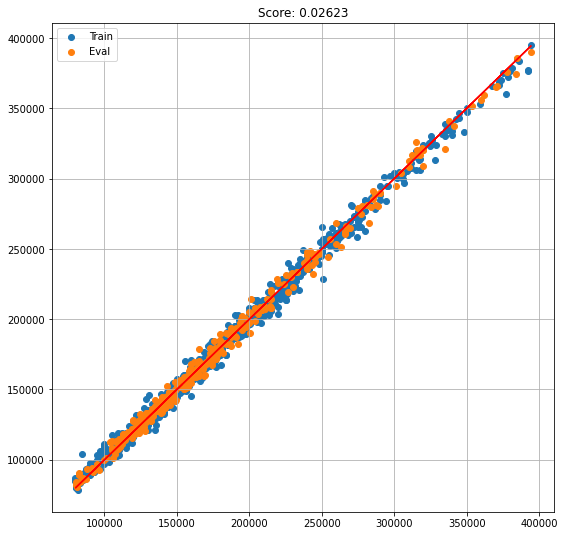

In [134]:
plot_evaluation(y_test, y_pred, y_train, y_pred_train)

## Making the predictions

In [111]:
df_eval = test_data.drop(columns=['Id'])

df_eval[categorical_cols] = df_eval[categorical_cols].fillna('_')
df_eval[numerical_cols] = df_eval[numerical_cols].fillna(df_eval[numerical_cols].mean())

X_eval = df_eval

In [112]:
X_eval_transf = ct.transform(X_eval)

In [113]:
y_eval = reg.predict(X_eval_transf)

In [114]:
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission[target_col] = y_eval
submission

,Id,SalePrice
0,1461,121481.671875
1,1462,164970.578125
2,1463,175135.625000
3,1464,186825.171875
4,1465,172851.656250
...,...,...
1454,2915,98770.351562
1455,2916,95175.179688
1456,2917,181034.078125
1457,2918,116507.867188


In [115]:
submission.to_csv('submission.csv', index=False)